In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [2]:
np.set_printoptions(threshold=sys.maxsize)
STATE = 0

## First part of the homework: Predict turnover rate

In [3]:
df = pd.read_csv('HW3_hr-analytics.csv')

In [4]:
df.rename(columns={'average_montly_hours': 'average_monthly_hours', 'sales': 'department'}, inplace=True)

In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
# Check if there's missing data in the dataset and if the type of the column is numerical value or not
for column in df.columns:
    if df[column].dtypes != "int64" and df[column].dtypes != "float64":  # Check which columms are not number
        if df[column].isnull().values.any():
            print(f"[{column}] data type: {df[column].dtypes}, missing some data")
            df[column].fillna(df[column].mode()[0], inplace=True)  # Fill NaNs with the most frequent data
        else:
            print(f"[{column}] data type: {df[column].dtypes}")
    else:
        if df[column].isnull().values.any():
            print(f"[{column}] data type: {df[column].dtypes}, missing some data")
            df[column].fillna(df[column].mean(), inplace=True)  # Fill NaNs with mean of data

[department] data type: object
[salary] data type: object


In [7]:
one_hot_list = ['department', 'salary']

df_one_hot_encoding = pd.get_dummies(df, columns = one_hot_list)
df_one_hot_encoding

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [8]:
# Split the dataset into 70% of the training set and 30% of the test set
y = df["left"]
x = df.drop(columns=["left", "department", "salary"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=STATE)

In [9]:
# Predict with raw dataset (with one hot encoding)
clf = linear_model.LogisticRegression(max_iter=500, random_state=STATE).fit(x_train, y_train)
pred_left = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)
score = clf.score(x_test, y_test)
print(score)

0.768


Text(0.5, 1.0, 'Accuracy: 76.80%')

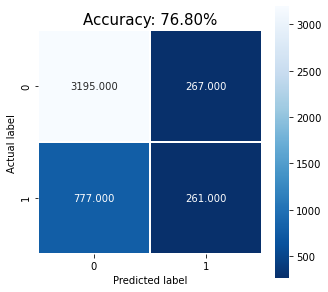

In [10]:
# Plot the confusion matrix to better understand the model
plt.figure(figsize=(5, 5))
cm = metrics.confusion_matrix(y_test, pred_left)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy: {:.2f}%'.format(score * 100)
plt.title(all_sample_title, size=15)

<AxesSubplot:>

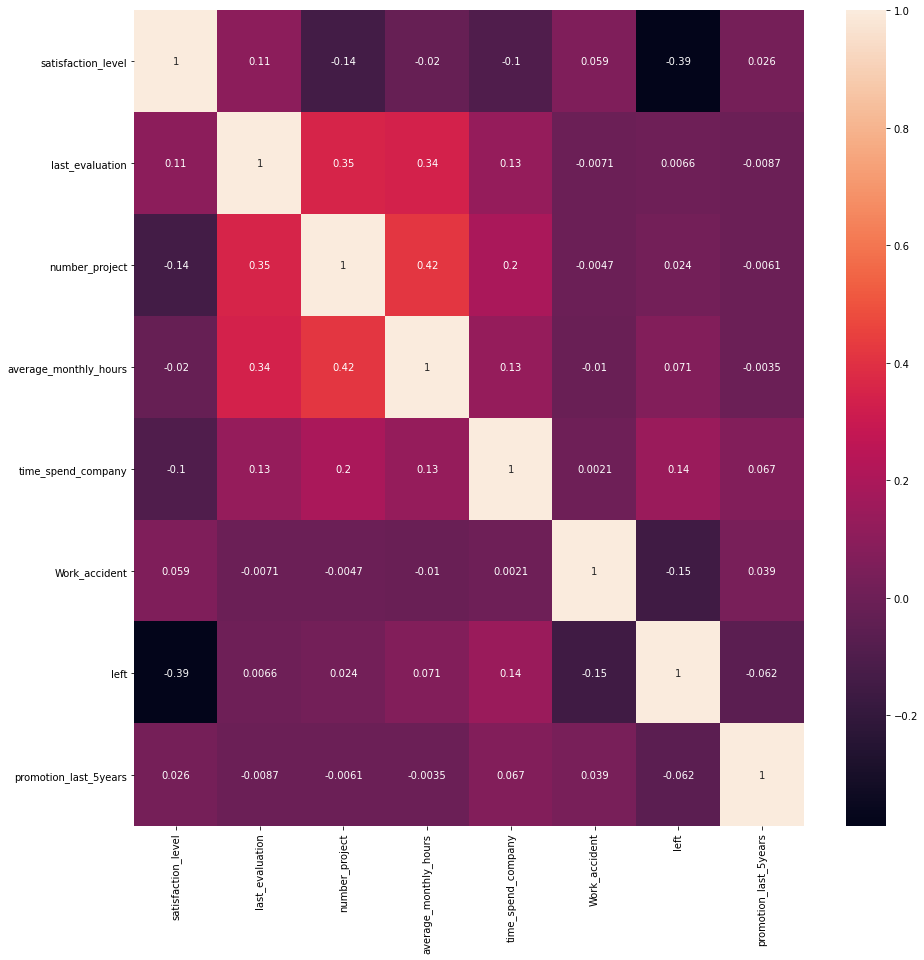

In [11]:
# Draw correlation map
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True)

In [12]:
# Observe the correaltion between 'left' and other features
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### *Several observations can be done from the above diagram:*
* The employees with lower satisfaction level are prone to left the company.
* The 'last_evaluation' feature has no real significance on whether an employee leaves or not.
* The employees who did more projects are more likely to leave.
* The employees that left the company have more average monthly hours.
* The employees that left the company spend more time in the company.
* Work accident occured more frequently on the employees who did not leave.
* The employees that left the company have a lower promotion rate than those who stayed.

In [13]:
df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


The higher the salary, the less chance for an employee to leave.

In [14]:
df.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [15]:
# Calculate the average number of projects each employee finished in one year
average_project_per_year = df['number_project'].values / df['time_spend_company'].values
df.insert(0, 'average_project_per_year', average_project_per_year)

In [16]:
df

,average_project_per_year,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.666667,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.833333,0.80,0.86,5,262,6,0,1,0,sales,medium
2,1.750000,0.11,0.88,7,272,4,0,1,0,sales,medium
3,1.000000,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.666667,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.666667,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.666667,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.666667,0.37,0.53,2,143,3,0,1,0,support,low
14997,1.500000,0.11,0.96,6,280,4,0,1,0,support,low


In [17]:
df_trans = df.copy()

<AxesSubplot:ylabel='Density'>

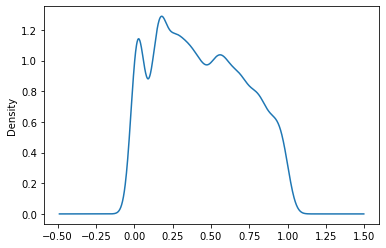

In [18]:
df_trans['satisfaction_level'] = np.power(df['satisfaction_level'], 2)
df_trans['satisfaction_level'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

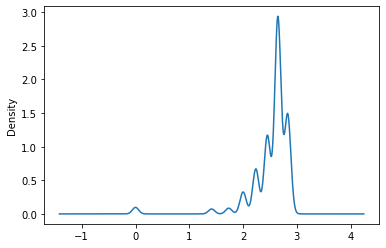

In [19]:
df_trans['time_spend_company'] = np.sqrt(np.max(df['time_spend_company']) - df['time_spend_company'])
df_trans['time_spend_company'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

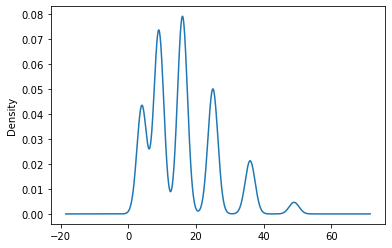

In [20]:
df_trans['number_project'] = np.power(df['number_project'], 2)
df_trans['number_project'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

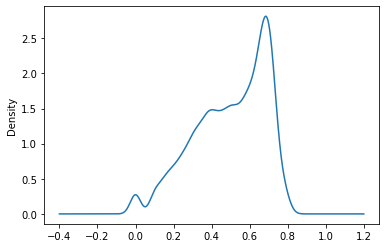

In [21]:
df_trans['last_evaluation'] = np.sqrt(np.max(df['last_evaluation']) - df['last_evaluation'])
df_trans['last_evaluation'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

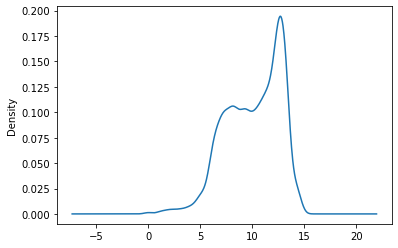

In [22]:
#average_project_per_year
df_trans['average_monthly_hours'] = np.sqrt(np.max(df['average_monthly_hours']) - df['average_monthly_hours'])
df_trans['average_monthly_hours'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

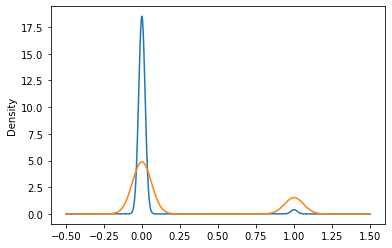

In [23]:
df_trans['promotion_last_5years'].plot(kind='kde')
df_trans['left'].plot(kind='kde')

In [24]:
# Split the dataset into 70% of the training set and 30% of the test set
y = df_trans["left"]
x = df_trans.drop(columns=["left", "department", "salary"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=STATE)

In [25]:
clf = linear_model.LogisticRegression(max_iter=1000, random_state=STATE).fit(x_train, y_train)
pred_left = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)
score = clf.score(x_test, y_test)
print(score)

0.8946666666666667


Text(0.5, 1.0, 'Accuracy: 89.47%')

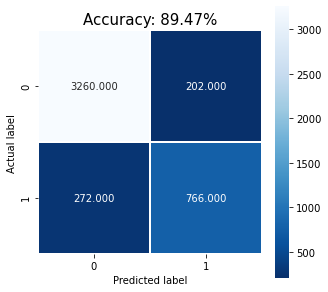

In [26]:
# Plot the confusion matrix after feature engineering
plt.figure(figsize=(5, 5))
cm = metrics.confusion_matrix(y_test, pred_left)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy: {:.2f}%'.format(score * 100)
plt.title(all_sample_title, size=15)

經過反覆測試後，發現 "department" 和 "salary" 會使模型的準確度降低，可能是因為是categorical feature的原因，換成數字型態無法符合線性函式的模式，所以把他們剔除掉，而其他特徵的部分，我先將 "time_spend_company" 和  "number_project" 結合成平均一年完成的專案數量後，再觀察不同特徵的分布，分別對各項特徵做轉換，模型準確率有明顯的上升。

## Second part of the homework: Predict bike sharing demand

In [27]:
df = pd.read_csv('HW3_bike-sharing.csv')

In [28]:
# Convert some columns into categorical feature
season = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].map(season)

weather = {1: 'Clear', 2: 'Cloudy', 3: 'Light_rain', 4: 'Heavy_rain'}
df['weather'] = df['weather'].map(weather)

In [29]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-1-1 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,16
1,2011-1-1 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,40
2,2011-1-1 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,32
3,2011-1-1 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,13
4,2011-1-1 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.425,61,6.0032,129


In [30]:
# Extract month and hour in a day from 'datetime'
month = []
hour = []
datetime = pd.to_datetime(df['datetime'])

for time in datetime:
    month.append(int(str(time)[5:7]))
    hour.append(int(str(time)[11:13]))

In [31]:
new_df = df.copy()
new_df = new_df.drop(columns=['datetime'])
new_df.insert(0, 'hour', hour)
new_df.insert(0, 'month', month)
new_df

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,Spring,0,0,Clear,9.84,14.395,81,0.0000,16
1,1,1,Spring,0,0,Clear,9.02,13.635,80,0.0000,40
2,1,2,Spring,0,0,Clear,9.02,13.635,80,0.0000,32
3,1,3,Spring,0,0,Clear,9.84,14.395,75,0.0000,13
4,1,4,Spring,0,0,Clear,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,12,19,Winter,0,1,Clear,15.58,19.695,50,26.0027,336
10882,12,20,Winter,0,1,Clear,14.76,17.425,57,15.0013,241
10883,12,21,Winter,0,1,Clear,13.94,15.910,61,15.0013,168
10884,12,22,Winter,0,1,Clear,13.94,17.425,61,6.0032,129


In [32]:
# Apply one hot encoding to convert categorical features to numerical features
one_hot_list = ['hour', 'month', 'season', 'weather']

df_one_hot_encoding = pd.get_dummies(new_df, columns = one_hot_list)

In [33]:
df_one_hot_encoding

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour_0,hour_1,hour_2,...,month_11,month_12,season_Fall,season_Spring,season_Summer,season_Winter,weather_Clear,weather_Cloudy,weather_Heavy_rain,weather_Light_rain
0,0,0,9.84,14.395,81,0.0000,16,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0000,40,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0000,32,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0000,13,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0000,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,336,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10882,0,1,14.76,17.425,57,15.0013,241,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,0,1,13.94,15.910,61,15.0013,168,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,0,1,13.94,17.425,61,6.0032,129,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [34]:
# Split the dataset into 70% of the training set and 30% of the test set
y = df_one_hot_encoding["count"]
x = df_one_hot_encoding.drop(columns=["count"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=STATE)

In [35]:
# Use linear regression to predict user count
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train, y_train)

pred_count = linear_reg.predict(x_test)

score = linear_reg.score(x_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.6198962954798954
